In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
!pip install glove_python

     |████████████████████████████████| 266kB 8.0MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700270 sha256=8529c9363414dd0bfd03dc0be911f3d3c927632f5cc00cec07e313cdc4642866
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


In [ ]:
!pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 136kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


### Load Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet

from bs4 import BeautifulSoup
import re,string,unicodedata

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation

import keras
from keras.preprocessing import text, sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau

import tensorflow as tf

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("../content/drive/My Drive")

In [ ]:
!ls "/content/drive/My Drive/IDS_703 Final Project"

GoogleNews-vectors-negative300.gensim.vectors.npy  train.tsv
test.tsv					   valid.tsv


In [ ]:
def read_file(filename): 
  tain_file = open(filename)
  df = pd.read_csv(tain_file, delimiter="\t", header = None)
  df.rename(columns = {0:'ID', 1:'label', 2:'statement', 3:'subject', 
                           4:'speaker', 5:'job_title', 6:'state', 7:'party', 
                           8:'barely_true_counts', 9:'false_counts', 10:'half_true_counts',
                           11:'mostly_true_counts', 12:'pants_on_fire_counts', 13:'location'}, inplace = True)
  return df

train_df = read_file('/content/drive/My Drive/IDS_703 Final Project/train.tsv')
test_df = read_file('/content/drive/My Drive/IDS_703 Final Project/test.tsv')
valid_df = read_file('/content/drive/My Drive/IDS_703 Final Project/valid.tsv')
train_df.head()

,ID,label,statement,subject,speaker,job_title,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,location
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


[Text(0, 0, 'false'),
 Text(0, 0, 'half-true'),
 Text(0, 0, 'mostly-true'),
 Text(0, 0, 'true'),
 Text(0, 0, 'barely-true'),
 Text(0, 0, 'pants-fire')]

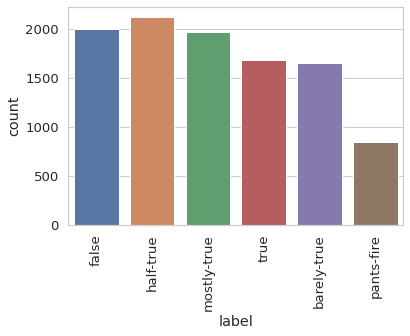

In [ ]:
# The distrubution of labels
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "label", data = train_df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

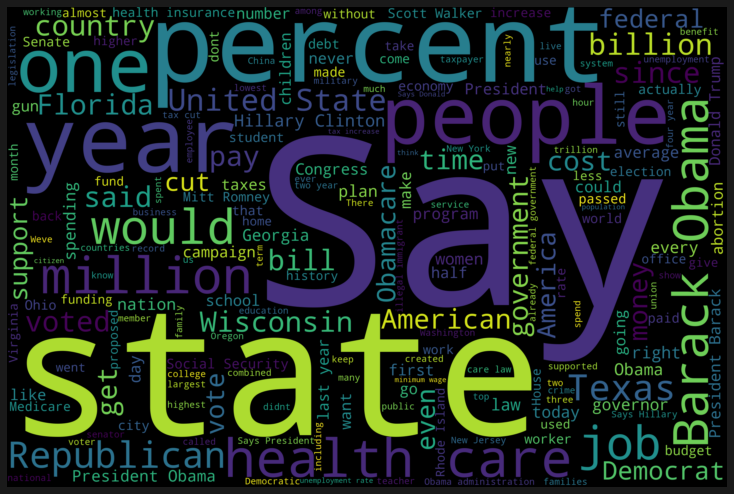

In [ ]:
# visualize the word features
text = ''
for news in train_df.statement.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (10, 7.5),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

###Data Cleaning

In [ ]:
# drop other columns of the data
def content_only(df):
  new_df = df[['label', 'statement']]
  return new_df

train = content_only(train_df)
test = content_only(test_df)
valid = content_only(valid_df)
train.head()

,label,statement
0,false,Says the Annies List political group supports ...
1,half-true,When did the decline of coal start? It started...
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."
3,false,Health care reform legislation is likely to ma...
4,half-true,The economic turnaround started at the end of ...


In [ ]:
stops = set(stopwords.words('english'))

# Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stops:
            final_text.append(i.strip())
    return " ".join(final_text)

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing the noisy text
def denoise_text(text):
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

# Apply function on statement column
statement_train = [denoise_text(s) for s in train['statement'].values]
statement_test = [denoise_text(s) for s in test['statement'].values]
statement_valid = [denoise_text(s) for s in valid['statement'].values]

# Get lables (Consider combine the levels)
label_train = train['label'].values
label_test = test['label'].values
label_valid = valid['label'].values

# PART I



*   **Data Preprocessing**: 
> Create 'list of lists' where every document is contained in a list and every list contains lists of tokens of that document for model training

*   **Glove Model Training**
> Training Glove using Glove Package
*   **Word2Vec Model Training**
> Training W2V using Gensim.models

*   **Comparison**
> Similarity task and Classification task on fake news




#### Data Preprocessing

In [ ]:
from string import punctuation
table = str.maketrans('', '', string.punctuation)

def makeWords(sentences):
  wordList = []
  for headline in sentences:
    words = headline.split(' ')
    stripped = [w.strip().translate(table) for w in words]
    wordList.append(stripped)
  return wordList

words_train = makeWords(statement_train)
words_test = makeWords(statement_test)
words_valid = makeWords(statement_valid)

### Glove_Embeddings

In [ ]:
## Glove_Embedding Using Gensim
from __future__ import print_function
import argparse
import pprint
import gensim

from glove import Glove
from glove import Corpus

In [ ]:
# Build the corpus dictionary and the cooccurrence matrix.
print('Pre-processing corpus')

corpus_model = Corpus()
corpus_model.fit(words_train, window=10)
#Corpus.save('corpus.model')
        
print('Dict size: %s' % len(corpus_model.dictionary))
print('Collocations: %s' % corpus_model.matrix.nnz)

Pre-processing corpus
Dict size: 14820
Collocations: 468220


In [ ]:
# Fit glove vectorizer with concurrence matrix from Corpus class
glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus_model.matrix)
glove.add_dictionary(corpus_model.dictionary)

# glove.save('glove.model')

In [ ]:
len(glove.dictionary)

14820

In [ ]:
# This is what we need to pass into LSTM as embedding matrix. Note that this is 100d.
glove.word_vectors[0]

array([ 0.03156547, -0.07040541, -0.1324281 ,  0.09502817, -0.13412476,
       -0.01665749,  0.05669041,  0.17238746, -0.09803423, -0.0247958 ,
        0.18092222, -0.11109698, -0.19842123,  0.16906596,  0.10591473,
       -0.16733874, -0.15728307,  0.11583203,  0.07726149,  0.05402615,
        0.02266853, -0.06945517,  0.09177094, -0.03368184, -0.05359293,
       -0.30410655, -0.07294127, -0.18274863, -0.03750149, -0.06650219,
        0.06115437, -0.01496648,  0.13650179,  0.19432663, -0.13687107,
       -0.05618804,  0.22286245, -0.04645354,  0.12924801, -0.11740335,
        0.07065747,  0.03466399, -0.06702662,  0.24746732, -0.17383647,
       -0.26599584,  0.19131626, -0.14579482,  0.13044791,  0.04179214,
        0.18871769,  0.11444902, -0.0231911 ,  0.21782412, -0.12328802,
       -0.06705418,  0.258684  ,  0.05723701, -0.05783953, -0.00668758,
        0.14184973,  0.05222043,  0.26688097,  0.16693011,  0.15508993,
        0.04773918, -0.09947622,  0.08492467,  0.07118347,  0.19


### W2V Embeddings


In [ ]:
from gensim.models import Word2Vec 

W2V = Word2Vec(words_train,size= 100,workers=3, window =3, sg = 0) # sg == 1 skip-gram or sg==0 CBOW

In [ ]:
len(W2V.wv.vocab)

3576

In [ ]:
W2V[W2V.wv.vocab][0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.03874494,  0.16213486,  0.13426846, -0.46043244, -0.37390125,
        0.09515623,  0.11371222,  0.11035976,  0.59934175,  0.03530229,
        0.52905977,  0.05166401,  0.0392719 , -0.57653266, -0.820896  ,
        0.6761028 ,  0.03357478, -0.04978913, -0.2907899 ,  0.37699792,
        0.6413047 ,  0.11954798, -0.3486202 ,  0.21810454,  0.45677817,
       -0.68426925,  0.6555346 , -0.39305812,  0.47555327,  0.29496372,
        0.68204707,  0.01298959,  0.5692451 , -0.27565438, -0.14625455,
        0.01864721,  0.6340895 , -0.54889256, -0.19483805, -0.62950796,
       -0.06102329,  0.0279291 , -0.21340929, -0.03769099, -0.6302889 ,
        0.23989125, -0.60950416,  0.1153925 , -0.3025515 ,  0.18753503,
        0.16132945, -0.30374438, -0.0256114 , -0.39212582, -0.71977323,
       -0.16299318,  0.2135458 , -0.5098502 , -0.53663003,  0.28794694,
        0.47097686, -0.16467652, -0.4526807 , -0.165377  ,  0.27600536,
        0.55752057, -0.5188006 ,  0.24045572, -0.21357152,  0.09

### Comparison

**similarity**

In [ ]:
# The word we pass in must be inside the glove dictionary. Therefore, we should find a large dataset such as google news.
glove.most_similar('president')

[('Obamas', 0.9672835889396817),
 ('Obama', 0.9658297756793226),
 ('President', 0.9650272361866978),
 ('Barack', 0.9632462905244339)]

In [ ]:
W2V.wv.most_similar('president')

[('senator', 0.9985342025756836),
 ('doubled', 0.9985116720199585),
 ('has', 0.9983669519424438),
 ('came', 0.998204231262207),
 ('became', 0.9981736540794373),
 ('liberal', 0.9981181621551514),
 ('appointed', 0.998091459274292),
 ('November', 0.9980850219726562),
 ('attack', 0.9980124235153198),
 ('running', 0.9978138208389282)]

# PART 2

Classification with LSTM model

### Load pretrained vectors

Pre-Trained Glove

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_features = 10000
maxlen = 700

# prepare tokenizer
tokenizer = Tokenizer(num_words=max_features)

#preparing vocabulary
tokenizer.fit_on_texts(words_train)

#converting text into integer sequences
sequences = tokenizer.texts_to_sequences(words_train) 

#padding to prepare sequences of same length
X_train = pad_sequences(sequences, maxlen=maxlen, padding = 'post')

# record the size of the vocab
vocab_size=len(tokenizer.word_index) + 1 #+1 for padding
print(vocab_size)

13391


In [ ]:
# prepare X_test
tokenizer = Tokenizer(num_words=max_features)

#preparing vocabulary
tokenizer.fit_on_texts(words_test)

#converting text into integer sequences
sequences = tokenizer.texts_to_sequences(words_test) 

#padding to prepare sequences of same length
X_test = pad_sequences(sequences, maxlen=maxlen, padding = 'post')

In [ ]:
# prepare X_valid
tokenizer = Tokenizer(num_words=max_features)

#preparing vocabulary
tokenizer.fit_on_texts(words_valid)

#converting text into integer sequences
sequences = tokenizer.texts_to_sequences(words_valid) 

#padding to prepare sequences of same length
X_valid = pad_sequences(sequences, maxlen=maxlen, padding = 'post')

In [ ]:
# Pre-trained embedding
EMBEDDING_FILE = 'glove.6B.100d.txt'

In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open(EMBEDDING_FILE)

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [ ]:
# check few word to numerical replesentation
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break 

says -> 1
percent -> 2
health -> 3
state -> 4
obama -> 5
care -> 6
jobs -> 7
years -> 8
new -> 9
 -> 10


In [ ]:
# probably use this one instead of the chunck right after this
# create a weight matrix for words in training docs
EMBEDDING_DIM = 100
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    try:
        embedding_vector = embeddings_index[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

Pre-Trained W2V

In [ ]:
# Pre-trained embedding
gloveFile = 'enwiki_20180420_100d.txt'

In [ ]:
from gensim.test.utils import datapath
from gensim.models import KeyedVectors
wv_from_text = KeyedVectors.load_word2vec_format(gloveFile, binary=False)

In [ ]:
# create a weight matrix for words in training docs
EMBEDDING_DIM = 100
embedding_matrix_word2vec = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    try:
        embedding_vector = wv_from_text.get_vector(word)
        embedding_matrix_word2vec[i] = embedding_vector
    except KeyError:
        embedding_matrix_word2vec[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

### Model Training  -- LSTM

In [ ]:
# transform y_train
def transformLabel(newLabels):
  labels = newLabels.copy()
  for i in range(len(labels)):
    if labels[i] == ('pants-fire'):
      labels[i] = 0.0
    elif labels[i] == 'false':
      labels[i] = 0.0
    elif labels[i] == 'barely-true':
      labels[i] = 0.0
    elif labels[i] == 'true':
      labels[i] = 1.0
    elif labels[i] == 'mostly-true':
      labels[i] = 1.0
    else:
      labels[i] = 0.0
  labels = np.asarray(labels).astype('float32')
  return labels

y_train = transformLabel(label_train)
y_test = transformLabel(label_test)
y_valid = transformLabel(label_valid)

y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
y_valid = np.asarray(y_valid).astype('float32').reshape((-1,1))

In [ ]:
X_train.shape, y_train.shape

((10240, 700), (10240, 1))

### Glove as embedding

In [ ]:
# Define Model Parameters
batch_size = 256
epochs = 10
embed_size = 100

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
# Load the pre-trained word embedding matrix into an Embedding layer
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    vocab_size, 
    output_dim=EMBEDDING_DIM, 
    weights=[embedding_matrix], 
    input_length=maxlen, 
    trainable=False)

In [ ]:
#Defining Neural Network
model = Sequential()

#embeddidng layer
model.add(embedding_layer)

#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))

#Dense Layer
model.add(Dense(units = 32 , activation = 'relu'))

# modify here to change the range for label [0, k)
# also change sigmoid(binary) to softmax(multi-class) 
model.add(Dense(1, activation='sigmoid')) 

# change sparse_categorical_crossentropy to binary_crossentropy
# rmsprop
model.compile(
    loss='binary_crossentropy',
    optimizer="rmsprop",
    metrics=['accuracy'],
)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 700, 100)          1339100   
_________________________________________________________________
lstm_5 (LSTM)                (None, 700, 128)          117248    
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,507,869
Trainable params: 168,769
Non-trainable params: 1,339,100
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid))

320/320 [==============================] - 682s 2s/step - loss: 0.6609 - accuracy: 0.6447 - val_loss: 0.6372 - val_accuracy: 0.6729


In [ ]:
y_pred_glove = (model.predict(X_test) > 0.5).astype("int")

In [ ]:
print("Accuracy is {} for glove embedding.".format(accuracy_score(y_test, y_pred_glove)))

Accuracy is 0.6456195737963694 for glove embedding.


Accuray is 0.6456195737963694 if classifying half-true as false

Accuray is 0.56353591160221 if classifying half-true as true

In [ ]:
print(classification_report(y_test, y_pred_glove, zero_division = 1))

              precision    recall  f1-score   support

         0.0       0.65      1.00      0.78       818
         1.0       1.00      0.00      0.00       449

    accuracy                           0.65      1267
   macro avg       0.82      0.50      0.39      1267
weighted avg       0.77      0.65      0.51      1267



In [ ]:
#plot accuracy and loss and decide how many epoches to use
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Word2Vec as embedding

In [ ]:
# Load the pre-trained word embedding matrix into an Embedding layer
from tensorflow.keras.layers import Embedding

embedding_layer_word2vec = Embedding(
    vocab_size, 
    output_dim=EMBEDDING_DIM, 
    weights=[embedding_matrix_word2vec], 
    input_length=maxlen, 
    trainable=False)

In [ ]:
#Defining Neural Network
model_word2vec = Sequential()

#embeddidng layer
model_word2vec.add(embedding_layer_word2vec)

#LSTM 
model_word2vec.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model_word2vec.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))

#Dense Layer
model_word2vec.add(Dense(units = 32 , activation = 'relu'))

# modify here to change the range for label [0, k)
# also change sigmoid(binary) to softmax(multi-class) 
model_word2vec.add(Dense(1, activation='sigmoid')) 


model_word2vec.compile(
    loss='binary_crossentropy',
    optimizer="rmsprop",
    metrics=['accuracy'],
)

In [ ]:
model_word2vec.summary()

In [ ]:
historyWord2Vec = model_word2vec.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))

In [ ]:
y_pred_word2vec = (model_word2vec.predict(X_test) > 0.5).astype("int")

In [ ]:
print("Accuracy is {} for word2vec embedding.".format(accuracy_score(y_test, y_pred_word2vec)))

In [ ]:
print(classification_report(y_test, y_pred_word2vec, zero_division = 1))

In [ ]:
plot_graphs(historyWord2Vec, "accuracy")
plot_graphs(historyWord2Vec, "loss")